In [1]:
## Lab | Imbalanced Data

In [2]:
# Let's install all the libraries first
!pip install imblearn


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [5]:
# 1. Load the dataset and explore the variables.
customer_churn=pd.read_csv('/Users/mariasoriano/Desktop/Ironhack/lab-imbalanced-data/files_for_lab/customer_churn.csv')
customer_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
# 2. We will try to predict variable 'Churn' using a logistic regression on variables:
# 'tenure', 'SeniorCitizen', 'MonthlyCharges'.

# X/y Split
# 3. Extract the target variable
y = customer_churn['Churn']

# 4. Extract the independent vairables and scale them.
X = customer_churn.filter(['tenure', 'SeniorCitizen', 'MonthlyCharges'])

## Class Distribution

No     5174
Yes    1869
Name: Churn, dtype: int64


<AxesSubplot:ylabel='Churn'>

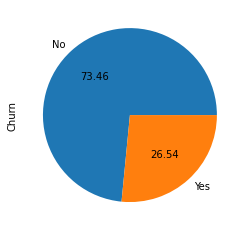

In [7]:
print(y.value_counts())
y.value_counts().plot.pie(autopct='%.2f')

### Now let's start building the logistic regression model (question 5)

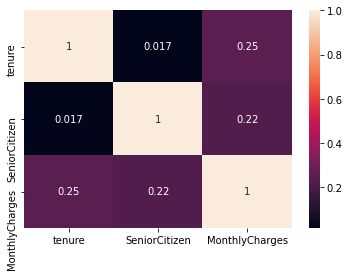

In [8]:
# 5. Build the logistic regression model.
correlations_matrix = X.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()

In [9]:
# Let's start the scaling with default test size of 0.2
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [10]:
# All features are numeric in the independent variables
transformer = StandardScaler()
transformer.fit(X_train) #fit transformer / sclaer (it's more correct to say transformer) in the train data
X_train_scaled_np = transformer.transform(X_train) #transform the train set -> np.array
X_train_scaled = pd.DataFrame(X_train_scaled_np, columns=X.columns) #cast into DataFrame

# because this is the only tranformation we apply to the numerics, (there are no categorical features in the df)
# we can immediately transform the X_test as well

X_test_scaled_np = transformer.transform(X_test)#transform test set
X_test_scaled = pd.DataFrame(X_test_scaled_np , columns=X.columns) #numpy array casted to dataframe

X_train_scaled.head()

,tenure,SeniorCitizen,MonthlyCharges
0,-0.340191,-0.435476,-0.514314
1,0.883210,2.296336,0.017840
2,-1.196572,-0.435476,-0.819594
3,1.168670,-0.435476,-1.483535
4,-0.829552,-0.435476,0.658427


In [11]:
y_train.head()

3296     No
6397     No
6043    Yes
5309     No
3000    Yes
Name: Churn, dtype: object

In [12]:
# Since the transformation reseted the index for the X_train_scaled we need to do the same for the Y_test
y_train = y_train.reset_index(drop=True) 
y_test = y_test.reset_index(drop=True) 

In [13]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=0, solver='lbfgs')
lr.fit(X_train_scaled, y_train) 

LogisticRegression(random_state=0)

In [14]:
lr.predict_proba(X_train_scaled)

array([[0.83055757, 0.16944243],
       [0.88959148, 0.11040852],
       [0.66558189, 0.33441811],
       ...,
       [0.98794797, 0.01205203],
       [0.25884511, 0.74115489],
       [0.79626532, 0.20373468]])

In [15]:
# Just checking something manually that we saw in class. 
# If we add the probability of both it has to return 1

lr.predict_proba(X_train_scaled)[0,0] + lr.predict_proba(X_train_scaled)[0,1]

1.0

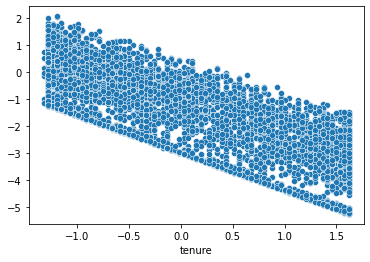

In [16]:
logits = np.log(lr.predict_proba(X_train_scaled)[:,1]/(lr.predict_proba(X_train_scaled)[:,0]))
sns.scatterplot(y = logits,x = X_train_scaled['tenure']);
plt.show()

#X = customer_churn.filter(['tenure', 'SeniorCitizen', 'MonthlyCharges'])

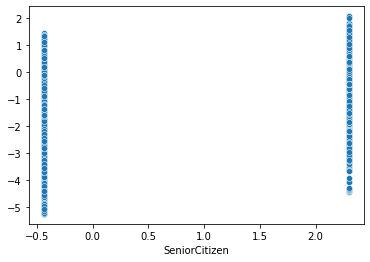

In [17]:
sns.scatterplot(y = logits,x = X_train_scaled['SeniorCitizen']);
plt.show()

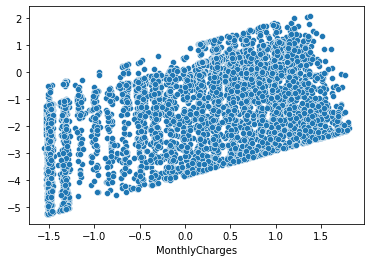

In [18]:
sns.scatterplot(y = logits,x = X_train_scaled['MonthlyCharges']);
plt.show()

No     5174
Yes    1869
Name: Churn, dtype: int64


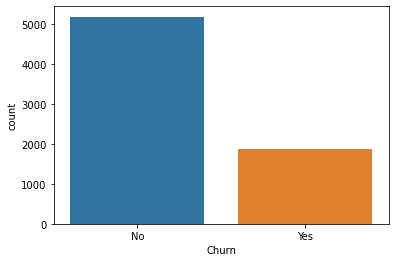

The class imbalance ratio is: 5173.73


In [19]:
# Let's check now if we have Imbalanced data
count_classes = customer_churn['Churn'].value_counts()
print(count_classes)
sns.countplot(x = 'Churn', data = customer_churn);
plt.show()

print("The class imbalance ratio is: {:.2f}".format(count_classes[0]-count_classes[1]/(count_classes[0]+count_classes[1])))

## Ok there's A LOT of Class Imbalance... wow!

In [34]:
# 6. Evaluate the model.
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score

y_pred_test = lr.predict(X_test_scaled)

print("The accuracy in the TEST set is: {:.2f}".format(accuracy_score(y_test,y_pred_test)))
print("The Kappa in the TEST set is: {:.2f}".format(cohen_kappa_score(y_test,y_pred_test)))
print("The precision in the TEST set is: {:.2f}".format(precision_score(y_test,y_pred_test, pos_label='Yes')))
print("The recall in the TEST set is: {:.2f}".format(recall_score(y_test,y_pred_test, pos_label='Yes')))
print("The F1 in the TEST set is: {:.2f}".format(f1_score(y_test,y_pred_test, pos_label='Yes')))

The accuracy in the TEST set is: 0.72
The Kappa in the TEST set is: 0.38
The precision in the TEST set is: 0.48
The recall in the TEST set is: 0.72
The F1 in the TEST set is: 0.57


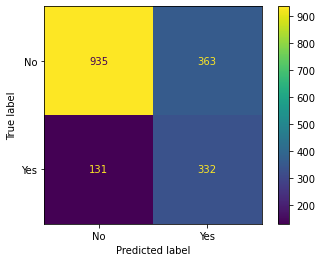

In [35]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm_test = confusion_matrix(y_test,y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=lr.classes_)
disp.plot()
plt.show()

In [22]:
# 7. Even a simple model will give us more than 70% accuracy. Why?

## The reasong why even a simple model will give us more than 70% accuracy is because the model does well with the group of Data that has the majority of samples.

## Let's apply now Synthetic Minority Oversampling Technique (SMOTE)
After this we will evaluate the logistic regression model again to see if there are any improvements

In [23]:
# 8. Synthetic Minority Oversampling TEchnique (SMOTE) is an over sampling technique based on nearest neighbors that adds new points between existing points.
# Apply imblearn.over_sampling.SMOTE to the dataset.
# Build and evaluate the logistic regression model. Is it there any improvement?


In [24]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=100,k_neighbors=3)
X_train_SMOTE,y_train_SMOTE = sm.fit_resample(X_train_scaled,y_train)

In [33]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_SMOTE, y_train_SMOTE)
pred = lr.predict(X_test_scaled)

print("The accuracy in the TEST set is: {:.2f}".format(accuracy_score(y_test,y_pred_test)))
print("The Kappa in the TEST set is: {:.2f}".format(cohen_kappa_score(y_test,y_pred_test)))
print("The precision in the TEST set is: {:.2f}".format(precision_score(y_test,y_pred_test, pos_label='Yes')))
print("The recall in the TEST set is: {:.2f}".format(recall_score(y_test,y_pred_test, pos_label='Yes')))
print("The F1 in the TEST set is: {:.2f}".format(f1_score(y_test,y_pred_test, pos_label='Yes')))

The accuracy in the TEST set is: 0.78
The Kappa in the TEST set is: 0.38
The precision in the TEST set is: 0.61
The recall in the TEST set is: 0.46
The F1 in the TEST set is: 0.52


### As we can see the model improves a little bit after the SMOTE but nothing significant... we can say that we still have a bad model

In [26]:
y_train_SMOTE.value_counts()

No     3876
Yes    3876
Name: Churn, dtype: int64

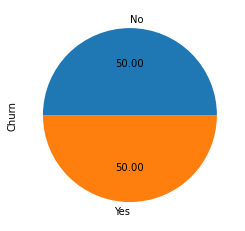

In [27]:
ax = y_train_SMOTE.value_counts().plot.pie(autopct='%.2f')

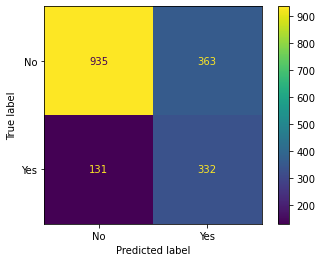

In [36]:
cm_test = confusion_matrix(y_test,y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=lr.classes_)
disp.plot()
plt.show()